In [63]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np
from tqdm.notebook import tqdm

# 1. Generate training data
def generate_circle_data(num_samples=1000, radius=1):
    angles = np.linspace(0, 2 * np.pi, num_samples)
    x = radius * np.cos(angles) + 0.01 * np.random.randn(num_samples)
    y = radius * np.sin(angles) + 0.01 * np.random.randn(num_samples)

    inside_points = np.vstack([x, y]).T
    outside_points = np.random.uniform(-1.5 * radius, 1.5 * radius, (num_samples, 2))

    points = np.vstack([inside_points, outside_points])
    labels = np.hstack([np.ones(num_samples), -np.ones(num_samples)])

    return torch.FloatTensor(points), torch.FloatTensor(labels).unsqueeze(1)

# 2. Define a simple neural network
class ImplicitNetwork(nn.Module):
    def __init__(self):
        super(ImplicitNetwork, self).__init__()
        self.net = nn.Sequential(
            nn.Linear(2, 128),
            nn.ReLU(),
            nn.Linear(128, 128),
            nn.ReLU(),
            nn.Linear(128, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.net(x)

# Generate data
points, labels = generate_circle_data(num_samples=4096)

# Create and train the model
model = ImplicitNetwork()
optimizer = optim.AdamW(model.parameters(), lr=0.001)
criterion = nn.MSELoss()

# 3. Train the network
n_epochs = 10000
for epoch in tqdm(range(n_epochs)):
    optimizer.zero_grad()
    outputs = model(points)
    loss = criterion(outputs, labels)
    loss.backward()
    optimizer.step()
    
    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{n_epochs}], Loss: {loss.item():.4f}')

  0%|          | 0/10000 [00:00<?, ?it/s]

Epoch [100/10000], Loss: 0.9914
Epoch [200/10000], Loss: 0.9511
Epoch [300/10000], Loss: 0.7892
Epoch [400/10000], Loss: 0.6931
Epoch [500/10000], Loss: 0.6503
Epoch [600/10000], Loss: 0.6252
Epoch [700/10000], Loss: 0.6086
Epoch [800/10000], Loss: 0.5970
Epoch [900/10000], Loss: 0.5886
Epoch [1000/10000], Loss: 0.5825
Epoch [1100/10000], Loss: 0.5780
Epoch [1200/10000], Loss: 0.5747
Epoch [1300/10000], Loss: 0.5722
Epoch [1400/10000], Loss: 0.5702
Epoch [1500/10000], Loss: 0.5687
Epoch [1600/10000], Loss: 0.5674
Epoch [1700/10000], Loss: 0.5664
Epoch [1800/10000], Loss: 0.5656
Epoch [1900/10000], Loss: 0.5649
Epoch [2000/10000], Loss: 0.5643
Epoch [2100/10000], Loss: 0.5638
Epoch [2200/10000], Loss: 0.5634
Epoch [2300/10000], Loss: 0.5630
Epoch [2400/10000], Loss: 0.5626
Epoch [2500/10000], Loss: 0.5623
Epoch [2600/10000], Loss: 0.5621
Epoch [2700/10000], Loss: 0.5618
Epoch [2800/10000], Loss: 0.5616
Epoch [2900/10000], Loss: 0.5614
Epoch [3000/10000], Loss: 0.5612
Epoch [3100/10000],

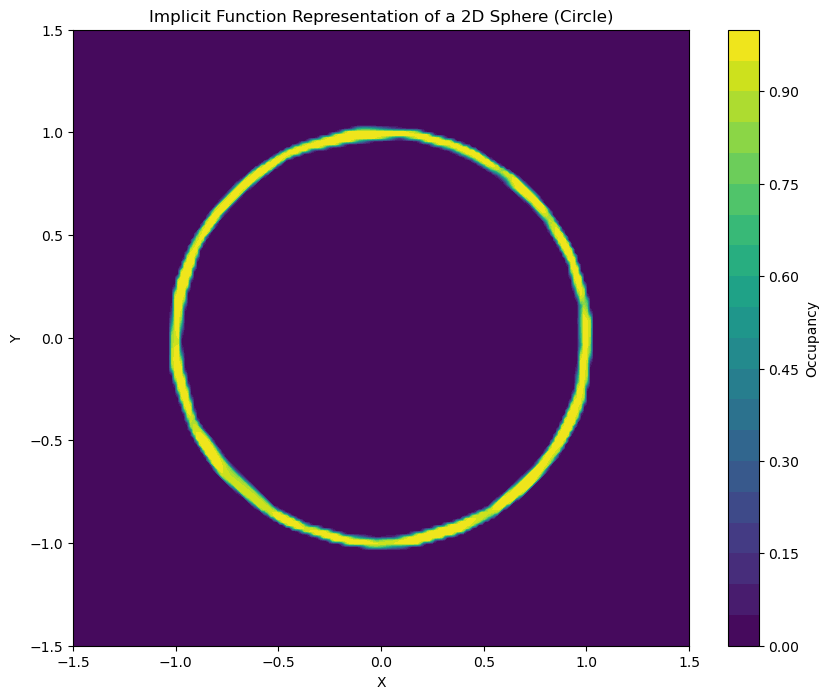

In [64]:
# 4. Visualize the results
with torch.no_grad():
    x = np.linspace(-1.5, 1.5, 200)
    y = np.linspace(-1.5, 1.5, 200)
    X, Y = np.meshgrid(x, y)
    XY = np.column_stack((X.ravel(), Y.ravel()))
    Z = model(torch.FloatTensor(XY)).numpy().reshape(X.shape)

plt.figure(figsize=(10, 8))
plt.contourf(X, Y, Z, levels=20, cmap='viridis')
plt.colorbar(label='Occupancy')
plt.title('Implicit Function Representation of a 2D Sphere (Circle)')
plt.xlabel('X')
plt.ylabel('Y')
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

In [11]:
# from transformers import ViTModel, ViTConfig

# class TransformerUNet(nn.Module):
#     def __init__(self, input_size=32, patch_size=4, hidden_size=192, num_heads=3, num_layers=4):
#         super(TransformerUNet, self).__init__()
        
#         self.input_size = input_size
#         self.patch_size = patch_size
#         self.hidden_size = hidden_size
        
#         # Encoder (downsampling path)
#         self.encoder_layers = nn.ModuleList()
#         for _ in range(num_layers):
#             config = ViTConfig(
#                 image_size=input_size,
#                 patch_size=patch_size,
#                 hidden_size=hidden_size,
#                 num_hidden_layers=1,
#                 num_attention_heads=num_heads,
#                 intermediate_size=hidden_size * 4
#             )
#             self.encoder_layers.append(ViTModel(config))
#             input_size //= 2
#             hidden_size *= 2
        
#         # Decoder (upsampling path)
#         self.decoder_layers = nn.ModuleList()
#         for _ in range(num_layers):
#             config = ViTConfig(
#                 image_size=input_size,
#                 patch_size=patch_size,
#                 hidden_size=hidden_size,
#                 num_hidden_layers=1,
#                 num_attention_heads=num_heads,
#                 intermediate_size=hidden_size * 4
#             )
#             self.decoder_layers.append(ViTModel(config))
#             input_size *= 2
#             hidden_size //= 2
        
#         self.final_layer = nn.Linear(hidden_size, 1)
#         self.sigmoid = nn.Sigmoid()
    
#     def forward(self, x):
#         # Reshape input to (batch_size, channels, height, width)
#         x = x.view(-1, 1, self.input_size, self.input_size)
        
#         # Encoder
#         encoder_outputs = []
#         for encoder in self.encoder_layers:
#             x = encoder(pixel_values=x).last_hidden_state
#             encoder_outputs.append(x)
#             x = x[:, 1:].view(x.size(0), -1, x.size(-1) // 2, 2).mean(dim=-1)
        
#         # Decoder
#         for decoder, encoder_output in zip(self.decoder_layers, reversed(encoder_outputs[:-1])):
#             x = torch.cat([x, encoder_output[:, 1:]], dim=1)
#             x = decoder(inputs_embeds=x).last_hidden_state
#             x = x.view(x.size(0), -1, x.size(-1) * 2)
        
#         # Final layer
#         x = self.final_layer(x)
#         x = self.sigmoid(x)
        
#         return x.squeeze(-1)
# class TransformerBlock(nn.Module):
#     def __init__(self, hidden_size, num_heads):
#         super(TransformerBlock, self).__init__()
#         self.attention = BertSelfAttention(BertConfig(hidden_size=hidden_size, num_attention_heads=num_heads))
#         self.norm1 = nn.LayerNorm(hidden_size)
#         self.ffn = nn.Sequential(
#             nn.Linear(hidden_size, hidden_size * 4),
#             nn.GELU(),
#             nn.Linear(hidden_size * 4, hidden_size)
#         )
#         self.norm2 = nn.LayerNorm(hidden_size)

#     def forward(self, x):
#         attention_output = self.attention(x)[0]
#         x = self.norm1(x + attention_output)
#         ffn_output = self.ffn(x)
#         x = self.norm2(x + ffn_output)
#         return x

# class TransformerUNet(nn.Module):
#     def __init__(self, input_size=32, patch_size=4, hidden_size=192, num_heads=3, num_layers=4):
#         super(TransformerUNet, self).__init__()
        
#         self.input_size = input_size
#         self.patch_size = patch_size
#         self.hidden_size = hidden_size
        
#         # Patch embedding
#         self.patch_embed = nn.Linear(patch_size * patch_size, hidden_size)
        
#         # Encoder (downsampling path)
#         self.encoder_layers = nn.ModuleList()
#         for _ in range(num_layers):
#             self.encoder_layers.append(TransformerBlock(hidden_size, num_heads))
#             hidden_size *= 2
        
#         # Decoder (upsampling path)
#         self.decoder_layers = nn.ModuleList()
#         for _ in range(num_layers):
#             self.decoder_layers.append(TransformerBlock(hidden_size, num_heads))
#             hidden_size //= 2
        
#         self.final_layer = nn.Linear(hidden_size, 1)
#         self.sigmoid = nn.Sigmoid()
    
#     def forward(self, x):
#         # Patch embedding
#         x = x.unfold(1, self.patch_size, self.patch_size).unfold(2, self.patch_size, self.patch_size)
#         x = x.contiguous().view(x.size(0), -1, self.patch_size * self.patch_size)
#         x = self.patch_embed(x)
        
#         # Encoder
#         encoder_outputs = []
#         for encoder in self.encoder_layers:
#             x = encoder(x)
#             encoder_outputs.append(x)
#             x = x[:, ::2, :]  # Downsample by taking every other token
        
#         # Decoder
#         for decoder, encoder_output in zip(self.decoder_layers, reversed(encoder_outputs[:-1])):
#             x = torch.cat([x, encoder_output], dim=1)
#             x = decoder(x)
#             x = x.repeat(1, 2, 1)  # Upsample by repeating tokens
        
#         # Final layer
#         x = self.final_layer(x)
#         x = self.sigmoid(x)
        
#         return x.squeeze(-1)

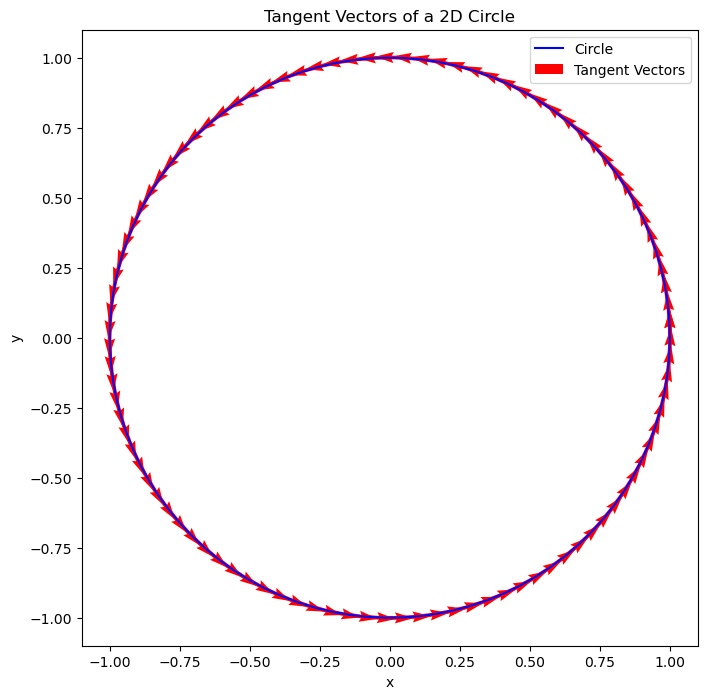

In [41]:
import numpy as np
import matplotlib.pyplot as plt

# Define the radius and number of sample points
radius = 1.0
num_samples = 100

# Generate points on the circle
angles = np.linspace(0, 2 * np.pi, num_samples)
circle_points = np.vstack([radius * np.cos(angles), radius * np.sin(angles)]).T

# Calculate the gradient and tangent vectors
gradients = 2 * circle_points
tangent_vectors = np.vstack([-gradients[:, 1], gradients[:, 0]]).T

# Normalize the tangent vectors for better visualization
tangent_vectors = tangent_vectors / np.linalg.norm(tangent_vectors, axis=1)[:, np.newaxis]

# Scale tangent vectors for visualization
scale = 0.1
tangent_vectors *= scale

# plot tangent vectors
plt.figure(figsize=(8, 8))
plt.plot(circle_points[:, 0], circle_points[:, 1], 'b-', label='Circle')
plt.quiver(circle_points[:, 0], circle_points[:, 1], tangent_vectors[:, 0], tangent_vectors[:, 1],
           color='r', angles='xy', scale_units='xy', scale=1, label='Tangent Vectors')

plt.gca().set_aspect('equal', adjustable='box')
plt.title('Tangent Vectors of a 2D Circle')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

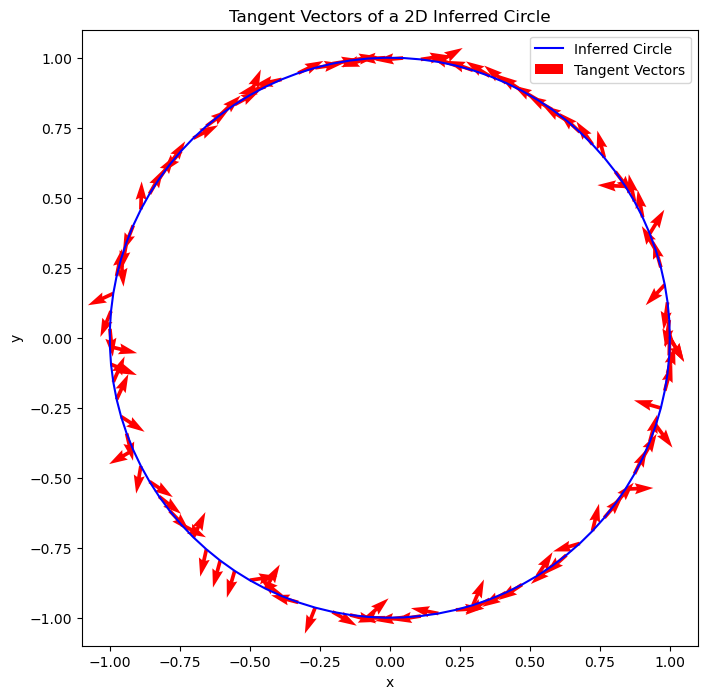

In [42]:
# Generate points on the inferred circle
num_samples = 100
angles = np.linspace(0, 2 * np.pi, num_samples)
circle_points = np.vstack([radius * np.cos(angles), radius * np.sin(angles)]).T
circle_points_tensor = torch.FloatTensor(circle_points).requires_grad_(True)

# Compute gradients (normal vectors) using autograd
model.eval()
outputs = model(circle_points_tensor)
gradients = torch.autograd.grad(outputs, circle_points_tensor, grad_outputs=torch.ones_like(outputs), create_graph=True)[0].detach().numpy()

# Calculate tangent vectors from gradients
tangent_vectors = np.vstack([-gradients[:, 1], gradients[:, 0]]).T

# Normalize tangent vectors for better visualization
tangent_vectors = tangent_vectors / np.linalg.norm(tangent_vectors, axis=1)[:, np.newaxis]

# Scale tangent vectors for visualization
scale = 0.1
tangent_vectors *= scale

plt.figure(figsize=(8, 8))
plt.plot(circle_points[:, 0], circle_points[:, 1], 'b-', label='Inferred Circle')
plt.quiver(circle_points[:, 0], circle_points[:, 1], tangent_vectors[:, 0], tangent_vectors[:, 1],
           color='r', angles='xy', scale_units='xy', scale=1, label='Tangent Vectors')

plt.gca().set_aspect('equal', adjustable='box')
plt.title('Tangent Vectors of a 2D Inferred Circle')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()


In [43]:
# # Generate data and train the model (as before)
# points, labels = generate_circle_data()
# grid_size = 32
# grid_points = torch.zeros(grid_size, grid_size)
# for point, label in zip(points, labels):
#     x, y = ((point + 1) / 2 * (grid_size - 1)).long()
#     grid_points[y, x] = label

# # Function to compute gradient
# def compute_gradient(model, x, y):
#     x = torch.tensor(x, requires_grad=True)
#     y = torch.tensor(y, requires_grad=True)
#     grid_input = torch.zeros(grid_size, grid_size)
#     grid_input[int((y + 1) / 2 * (grid_size - 1)), int((x + 1) / 2 * (grid_size - 1))] = 1
#     output = model(grid_input.unsqueeze(0))
#     output.backward(torch.ones_like(output))
#     return x.grad.item(), y.grad.item()

# # Visualize the results with tangent vectors
# with torch.no_grad():
#     x = np.linspace(-1, 1, grid_size)
#     y = np.linspace(-1, 1, grid_size)
#     X, Y = np.meshgrid(x, y)
    
#     grid_input = torch.zeros(grid_size, grid_size)
#     Z = model(grid_input.unsqueeze(0)).squeeze().numpy()

#     plt.figure(figsize=(12, 10))
#     plt.contourf(X, Y, Z, levels=20, cmap='viridis', alpha=0.7)
#     plt.colorbar(label='Occupancy')
    
#     # Compute and plot tangent vectors
#     num_vectors = 20
#     vector_points = np.random.uniform(-1, 1, (num_vectors, 2))
#     for point in vector_points:
#         grad_x, grad_y = compute_gradient(model, point[0], point[1])
#         tangent_x, tangent_y = -grad_y, grad_x  # Perpendicular to gradient
#         magnitude = np.sqrt(tangent_x**2 + tangent_y**2)
#         tangent_x, tangent_y = tangent_x / magnitude, tangent_y / magnitude  # Normalize
        
#         # Plot the tangent vector
#         plt.arrow(point[0], point[1], tangent_x * 0.1, tangent_y * 0.1, 
#                   head_width=0.03, head_length=0.05, fc='r', ec='r')

#     plt.title('Implicit Function Representation of a 2D Sphere (Circle) with Tangent Vectors')
#     plt.xlabel('X')
#     plt.ylabel('Y')
#     plt.gca().set_aspect('equal', adjustable='box')
#     plt.show()

In [ ]:
# import torch
# import torch.nn as nn
# import torch.optim as optim
# import numpy as np
# import matplotlib.pyplot as plt
# from torchdiffeq import odeint

# # Define the neural ODE model
# class ODEFunc(nn.Module):
#     def __init__(self):
#         super(ODEFunc, self).__init__()
#         self.net = nn.Sequential(
#             nn.Linear(2, 64),
#             nn.ReLU(),
#             nn.Linear(64, 64),
#             nn.ReLU(),
#             nn.Linear(64, 2)
#         )

#     def forward(self, t, x):
#         return self.net(x)

# class ODEBlock(nn.Module):
#     def __init__(self, odefunc):
#         super(ODEBlock, self).__init__()
#         self.odefunc = odefunc

#     def forward(self, x, t_span):
#         return odeint(self.odefunc, x, t_span)

# # Generate training data
# def generate_training_data(radius, num_samples):
#     angles = np.linspace(0, 2 * np.pi, num_samples)
#     x = radius * np.cos(angles) + 0.1 * np.random.randn(num_samples)
#     y = radius * np.sin(angles) + 0.1 * np.random.randn(num_samples)

#     inside_points = np.vstack([x, y]).T
#     outside_points = np.random.uniform(-1.5 * radius, 1.5 * radius, (num_samples, 2))

#     points = np.vstack([inside_points, outside_points])
#     labels = np.hstack([np.ones(num_samples), -np.ones(num_samples)])

#     return points, labels

# radius = 1.0
# num_samples = 1000
# points, labels = generate_training_data(radius, num_samples)

# points = torch.FloatTensor(points)
# labels = torch.FloatTensor(labels).unsqueeze(1)

# # Define the model and optimizer
# odefunc = ODEFunc()
# model = ODEBlock(odefunc)
# criterion = nn.MSELoss()
# optimizer = optim.Adam(model.parameters(), lr=0.001)

# # Train the model
# num_epochs = 5000
# for epoch in range(num_epochs):
#     optimizer.zero_grad()
#     outputs = model(points, torch.tensor([0.0, 1.0]))
#     loss = criterion(outputs[-1], labels)
#     loss.backward()
#     optimizer.step()

#     if (epoch + 1) % 500 == 0:
#         print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}')


In [59]:
# # Generate points on the inferred circle
# num_samples = 100
# angles = np.linspace(0, 2 * np.pi, num_samples)
# circle_points = np.vstack([radius * np.cos(angles), radius * np.sin(angles)]).T
# circle_points_tensor = torch.FloatTensor(circle_points).requires_grad_(True)

# # Compute gradients (normal vectors) using autograd
# model.eval()
# outputs = model(circle_points_tensor, torch.tensor([0.0, 1.0]))
# gradients = torch.autograd.grad(outputs[-1], circle_points_tensor, grad_outputs=torch.ones_like(outputs[-1]), create_graph=True)[0].detach().numpy()

# # Calculate tangent vectors from gradients
# tangent_vectors = np.vstack([-gradients[:, 1], gradients[:, 0]]).T

# # Normalize tangent vectors for better visualization
# tangent_vectors = tangent_vectors / np.linalg.norm(tangent_vectors, axis=1)[:, np.newaxis]

# # Scale tangent vectors for visualization
# scale = 0.1
# tangent_vectors *= scale

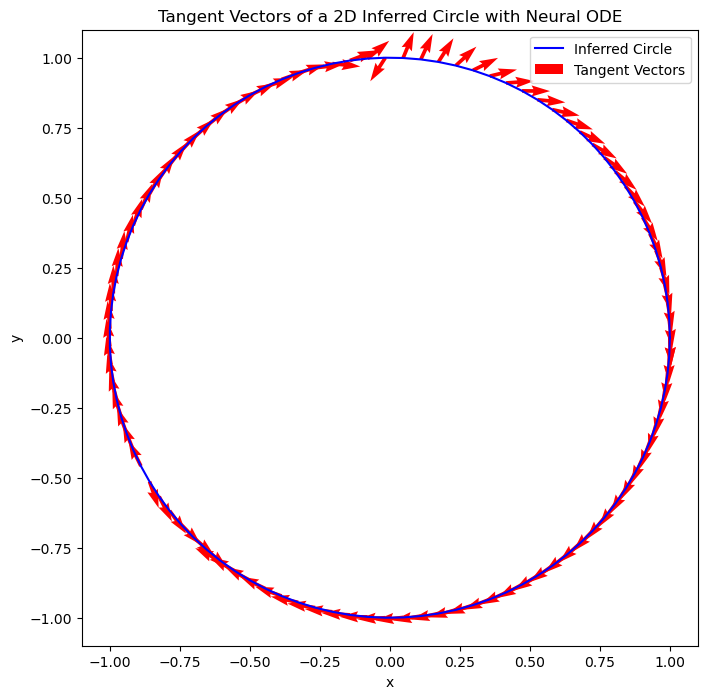

In [60]:
# plt.figure(figsize=(8, 8))
# plt.plot(circle_points[:, 0], circle_points[:, 1], 'b-', label='Inferred Circle')
# plt.quiver(circle_points[:, 0], circle_points[:, 1], tangent_vectors[:, 0], tangent_vectors[:, 1],
#            color='r', angles='xy', scale_units='xy', scale=1, label='Tangent Vectors')

# plt.gca().set_aspect('equal', adjustable='box')
# plt.title('Tangent Vectors of a 2D Inferred Circle with Neural ODE')
# plt.xlabel('x')
# plt.ylabel('y')
# plt.legend()
# plt.show()

## Estimation of the injectivity radius $R_1$

In [78]:
from scipy.optimize import minimize

In [81]:
# Define functions g_i(x, v) = t_i(x) * v
def g_i(x, v, i):
    return x[i] * v[i]

# Compute the partial derivatives of g_i with respect to x and v
def compute_LM(x, v, model):
    # Calculate ∂f/∂x
    f_x = model(x)
    grad_f = torch.autograd.grad(f_x, x, create_graph=True)[0]
    
    L_M = []
    for i in range(len(x)):
        g_i_x_v = g_i(x, v, i)
        grad_g_x = torch.autograd.grad(g_i_x_v, x, create_graph=True, retain_graph=True)[0]
        grad_g_v = torch.autograd.grad(g_i_x_v, v, create_graph=True, retain_graph=True)[0]
        
        # Compute the difference ∂g_i/∂x - ∂g_i/∂v
        grad_diff = grad_g_x - grad_g_v
        L_M.append(grad_diff)
    
    L_M = torch.stack(L_M)
    return L_M

# Define the objective function for optimization
def objective(params, model):
    x = torch.tensor(params[:2], requires_grad=True, dtype=torch.float32)
    v = torch.tensor(params[2:], requires_grad=True, dtype=torch.float32)
    L_M = compute_LM(x, v, model)
    determinant = torch.det(L_M)
    return torch.abs(determinant)

# Initial guess for x and v
initial_guess = np.random.randn(4)

# Optimize the objective function
result = minimize(lambda params: objective(params, model).item(), initial_guess, method='BFGS')

# Extract the optimal x and v
x_optimal = result.x[:2]
v_optimal = result.x[2:]

print(f'Optimal x: {x_optimal}')
print(f'Optimal v: {v_optimal}')

v_norm = np.linalg.norm(v_optimal)
print(v_norm)

Optimal x: [-2.07896776 -2.08218681]
Optimal v: [-0.97731912  1.62519772]
1.8964230280110943


## Estimation of the injectivity radius $R_2$ 

In [82]:
import numpy as np
import torch

# Define the circle parameters
num_samples = 360
angles = np.linspace(0, 2 * np.pi, num_samples)
circle_points = np.vstack([np.cos(angles), np.sin(angles)]).T
circle_points_tensor = torch.FloatTensor(circle_points).requires_grad_(True)

# Compute tangent vectors for the unit circle
tangent_vectors = torch.stack([-circle_points_tensor[:, 1], circle_points_tensor[:, 0]], dim=1)

# Function to find infimum
def find_infimum(data, tangents):
    min_value = float('inf')
    num_points = data.shape[0]

    for i in range(num_points):
        for j in range(i + 1, num_points):
            x1 = data[i]
            x2 = data[j]

            if torch.allclose(x1, x2):
                continue

            diff = x1 - x2
            tangent1 = tangents[i,:]
            tangent2 = tangents[j,:]

            if torch.abs(torch.inner(diff, tangent1)) < 1e-2 and torch.abs(torch.inner(diff, tangent2)) < 1e-2:
                value = 0.5 * torch.norm(diff).item()
                if value < min_value:
                    min_value = value

    return min_value

# Calculate the infimum
infimum = find_infimum(circle_points_tensor, tangent_vectors)
print(f'Infimum for the unit circle: {infimum}')


Infimum for the unit circle: 0.9999903440475464
